In [20]:
import networkx as nx
G = nx.DiGraph()

In [21]:
G.add_node("root")
G.add_node("db1")
G.add_node("t1")
G.add_node("t2")
G.add_node("t3")
G.add_node("t4")

In [22]:
G.add_edge("root", "db1")
G.add_edge("db1", "t1")
G.add_edge("db1", "t2")
G.add_edge("db1", "t3")
G.add_edge("db1", "t4")

In [25]:
# t1 has a FK referencing t2.id
G.add_edge("t1", "t2")
# t2 has a FK referencing t3.id
G.add_edge("t2", "t3")

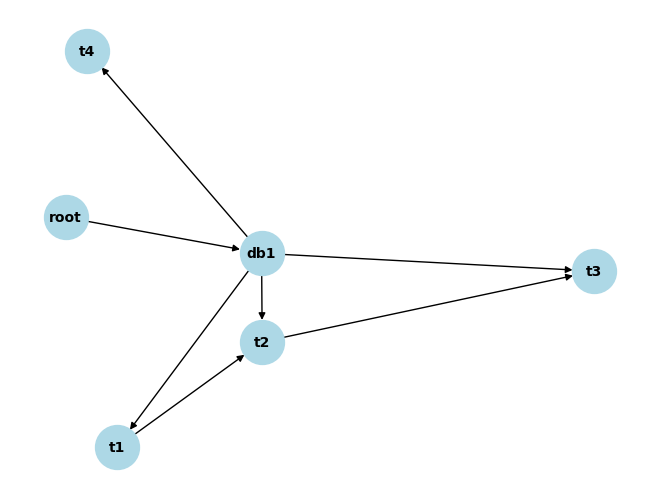

In [33]:
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')

In [34]:
# Step-by-step example: Building a schema graph and traversing it

import networkx as nx
from pprint import pprint

# ---------------------------
# Step 1: Define realistic DB schema
# ---------------------------

# Database: ecommerce
# Tables:
#   - users(user_id, name, email)
#   - orders(order_id, user_id, order_date)
#   - order_items(order_item_id, order_id, product_id, quantity)
#   - products(product_id, name, price)
#   - reviews(review_id, user_id, product_id, rating)

# ---------------------------
# Step 2: Build the graph (Type-1, Type-2, Type-3 edges)
# ---------------------------

G = nx.DiGraph()

# Type-1 edge: root -> database
G.add_edge("root", "ecommerce")  # Type-1

# Type-2 edges: database -> tables
tables = ["users", "orders", "order_items", "products", "reviews"]
for table in tables:
    G.add_edge("ecommerce", table)  # Type-2

# Type-3 edges: foreign key relationships between tables
G.add_edge("orders", "users")         # orders.user_id -> users.user_id
G.add_edge("order_items", "orders")   # order_items.order_id -> orders.order_id
G.add_edge("order_items", "products") # order_items.product_id -> products.product_id
G.add_edge("reviews", "users")        # reviews.user_id -> users.user_id
G.add_edge("reviews", "products")     # reviews.product_id -> products.product_id

# ---------------------------
# Step 3: Define traversal function (graph walk to extract schema paths)
# ---------------------------

def traverse_graph(graph, start_node, max_depth):
    paths = []

    def dfs(node, path, depth, visited):
        if depth > max_depth:
            return

        path.append(node)
        visited.add(node)

        if depth >= 1 and all(n in tables for n in path):
            paths.append(path.copy())

        for neighbor in graph.successors(node):
            if neighbor not in visited:
                dfs(neighbor, path, depth + 1, visited)

        path.pop()
        visited.remove(node)

    dfs(start_node, [], 0, set())
    return paths

# ---------------------------
# Step 4: Get all valid schema paths
# ---------------------------

schema_paths = traverse_graph(G, "ecommerce", max_depth=3)

# ---------------------------
# Step 5: Output results
# ---------------------------

print("Valid schema subsets (table paths):")
pprint(schema_paths)


Valid schema subsets (table paths):
[]
